# APLICAÇÃO DO PNL NA BASE DE DADOS DO IMDB PT-BR

O dataset imdb é um dos mais famosos benchmarks para modelos de classificação de textos que existe, esse notebook  usa o PNL para avaliar , a partir dos textos de usuários, se a perceção geral de um filme foi positiva ou negativa


## PREPARAR AMBIENTE

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import nltk
from nltk import tokenize
import seaborn as sns
from string import punctuation
import unidecode
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import ngrams

## 1.Conhecendo o banco de dados

In [6]:
resenha=pd.read_csv('imdb-reviews-pt-br.csv')
resenha.sample(10)

,id,text_en,text_pt,sentiment
32216,32218,"Seriously, I absolutely love these old movies ...","Sério, eu absolutamente amo esses filmes antig...",neg
5447,5449,The gates of Hell opened up and spit out this ...,Os portões do Inferno se abriram e cuspiram es...,neg
46383,46385,I loved this exiting republic serial! The stor...,Eu amei essa série republicana! A história foi...,pos
25825,25827,I dont know what Margaret Atwood was thinking ...,Eu não sei o que Margaret Atwood estava pensan...,neg
28973,28975,Drew Barrymore is an actress that has gone thr...,Drew Barrymore é uma atriz que passou por maus...,neg
30675,30677,"Okay, Ive watched this movie twice now, I have...","Ok, eu assisti este filme duas vezes agora, eu...",neg
17922,17924,"Telling the story wouldnt be the point at all,...","Contar a história não seria o ponto em tudo, s...",pos
14530,14532,This is from much of the same creative team be...,Este é de grande parte da mesma equipe criativ...,pos
40092,40094,Ive watched this documentary twice - and altho...,Eu assisti esse documentário duas vezes - e em...,pos
21864,21866,"This is one of my all time favorite movies, it...",Este é um dos meus filmes favoritos de todos o...,pos


In [8]:
# Tamanho do dataset
resenha.shape

(49459, 4)

In [10]:
# Explorando os textos

#Exemplo de avaliação negativa

print("Avalição Negativa \n")
print(resenha.text_pt[200])

Avalição Negativa 

Este é o terceiro filme em um mês que eu assisti que não saiu do jeito que eu esperava. Os dois primeiros são A Dália Negra e Hollywoodland, nenhum dos quais deu novas idéias de quem cometeu os crimes. Eu sempre tive um fascínio com OVNIs e estava tão empolgado para ver um novo filme sobre o tema da investigação sobre OVNIs que não era um comédia. Mas depois de 30 minutos, tudo deu muito errado. Eu poderia ter defendido a atuação, os ângulos de câmera, os estereótipos se houvesse uma boa história sobre perseguir OVNIs, mas nenhum aqui. Eu não estou dizendo que havia algo de errado com o assunto, mas Netflix empurrou este filme como um cético OVNI e um crente de OVNI investigando vários sitations.I parou de assistir a meio caminho. Não posso acreditar que perdi tanto tempo com este. Por favor, não cometa o mesmo erro que eu fiz.


In [13]:
print("Avalição Positivo \n")
print(resenha.text_pt[3999])

Avalição Positivo 

Como muitos filmes que envolvem criancinhas, isso começa "realmente fofo" e agradável ... e então, depois de cerca de meia hora ou mais, torna-se o contrário. Esse é certamente o caso aqui nessa história de viagem no tempo que eu normalmente amor onde um adulto encontra um garoto que ele realmente ele na idade de oito anos! Grande premissa e um grande ator principal em Bruce Willis, mas ..... O garoto "Rusty" é um pirralho esperto e Willis Rusty crescido agora como "Russell" se torna abrasivo com seus gritos constantes. Isso é entretenimento? Não, obrigado. Young Breslin se tornou um ótimo ator infantil, participando de vários filmes, incluindo "O Gato no Chapéu", contracenando com um ator infantil mais famoso: Dakota Fanning. No geral, um filme decepcionante, especialmente com toda a boa impressão que esse filme teve quando foi lançado.


In [15]:
#Verificar a proporção de avaliações positivas e negativas
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [20]:
#Tranformar sentimento em variáveis binárias
classificar=resenha.sentiment.replace(['neg','pos'],[0,1])
resenha['classificacao']=classificar
resenha.sample(2)

,id,text_en,text_pt,sentiment,classificacao
8920,8922,"Spoilers!! Bruce Willis, the part-time Comic a...","Spoilers !! Bruce Willis, o cara de meio-perío...",neg,0
43945,43947,This was a delightful presentation. Hemo blood...,Esta foi uma apresentação deliciosa. O sangue ...,pos,1


## 2.Bag of Words

In [21]:
#Vetorizar os textos do banco de dados

vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [22]:
# 1º Modelo de predição 

treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,resenha.classificacao, random_state = 42)
regressao_logistica = LogisticRegression(solver = "lbfgs")
regressao_logistica.fit(treino, classe_treino)
acuracia=regressao_logistica.score(teste, classe_teste)

print(acuracia.round(2))

0.66


In [23]:
#Automatizar processo de predição

def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression(solver = "lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)

## 3.Nuvem de palavras

In [24]:
todas_palavras=''.join([texto for texto in resenha.text_pt])
nuvem_palavras=WordCloud().generate(todas_palavras)

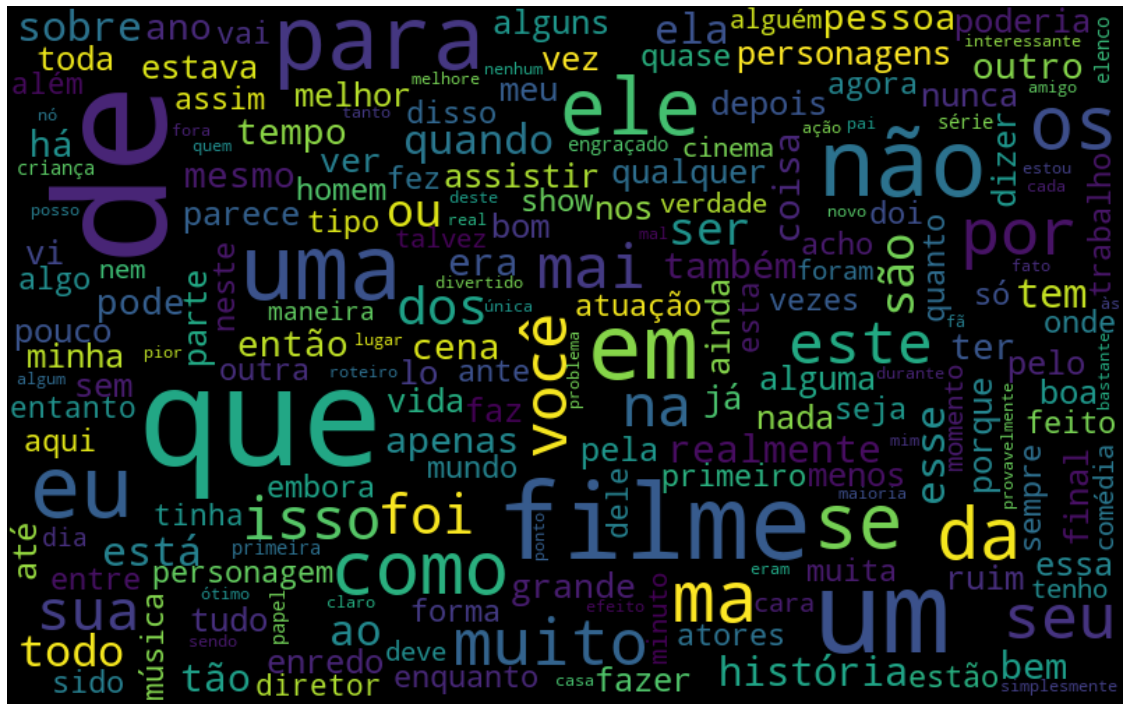

In [25]:
nuvem_palavras=WordCloud(width=800, height=500,max_font_size=110,
                         collocations=False).generate(todas_palavras) #limpar palavras repitdas
plt.figure(figsize=(20,20))                                           #tamanho da imagem
plt.imshow(nuvem_palavras,interpolation='bilinear')                   #resolução
plt.axis("off")                                                       #remover eixos
plt.show()

* Nuvem de avaliações negativas

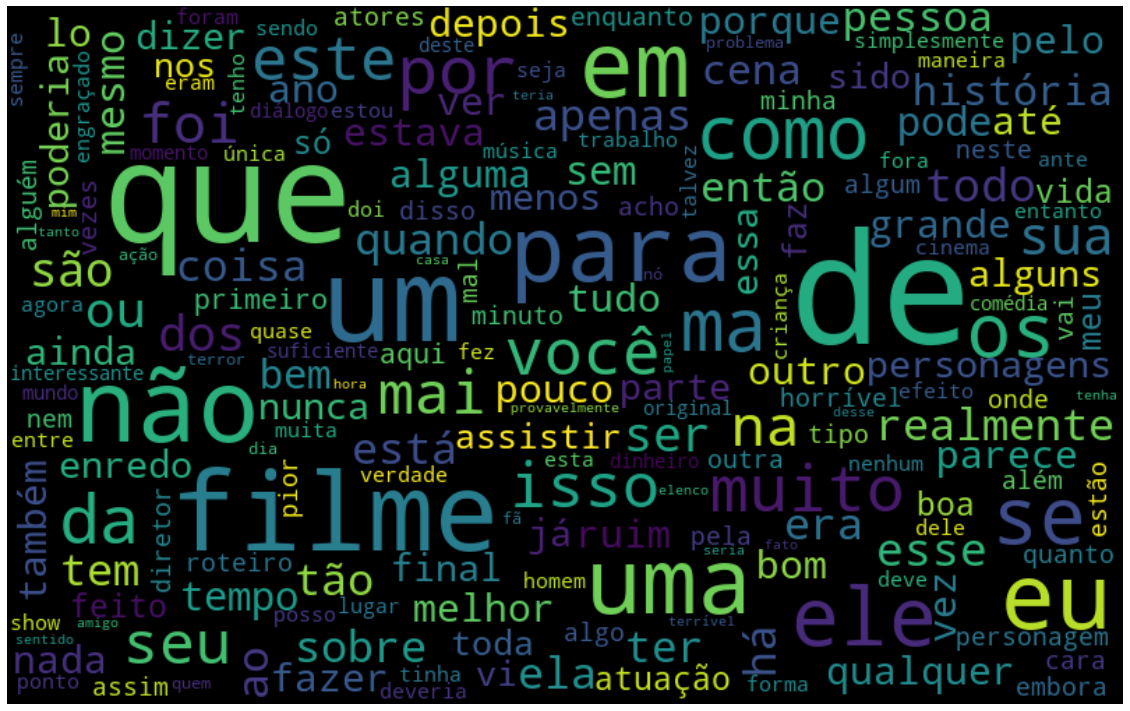

In [26]:
def nuvem_palavras_neg(texto,coluna_texto):
    texto_negativo=texto.query('sentiment=="neg"')
    
    todas_palavras=''.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_palavras=WordCloud(width=800, height=500,max_font_size=110,
                             collocations=False).generate(todas_palavras) #limpar palavras repitdas
    plt.figure(figsize=(20,20))                                           #tamanho da imagem
    plt.imshow(nuvem_palavras,interpolation='bilinear')                   #resolução
    plt.axis("off")                                                       #remover eixos
    plt.show()
    
nuvem_palavras_neg(resenha,"text_pt")

* Nuvem de avaliações positivas

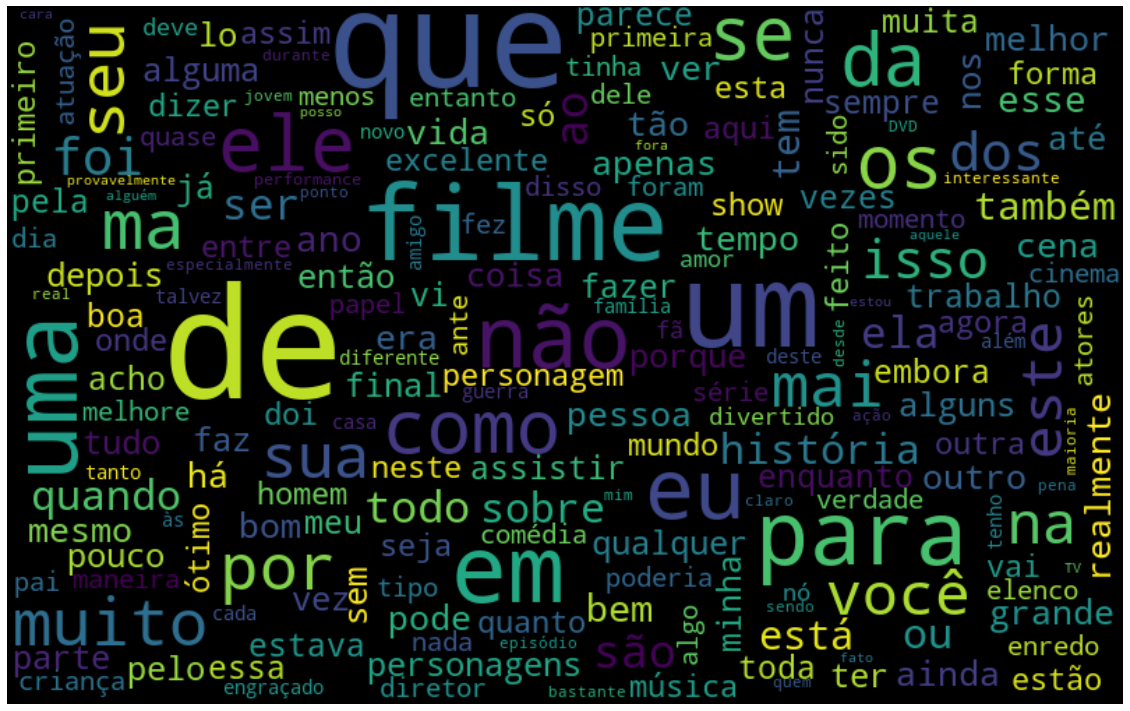

In [27]:
def nuvem_palavras_pos(texto,coluna_texto):
    texto_positivo=texto.query('sentiment=="pos"')
    
    todas_palavras=''.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_palavras=WordCloud(width=800, height=500,max_font_size=110,
                             collocations=False).generate(todas_palavras) #limpar palavras repitdas
    plt.figure(figsize=(20,20))                                           #tamanho da imagem
    plt.imshow(nuvem_palavras,interpolation='bilinear')                   #resolução
    plt.axis("off")                                                       #remover eixos
    plt.show()
    
nuvem_palavras_pos(resenha,"text_pt")

## 4.Tokenização

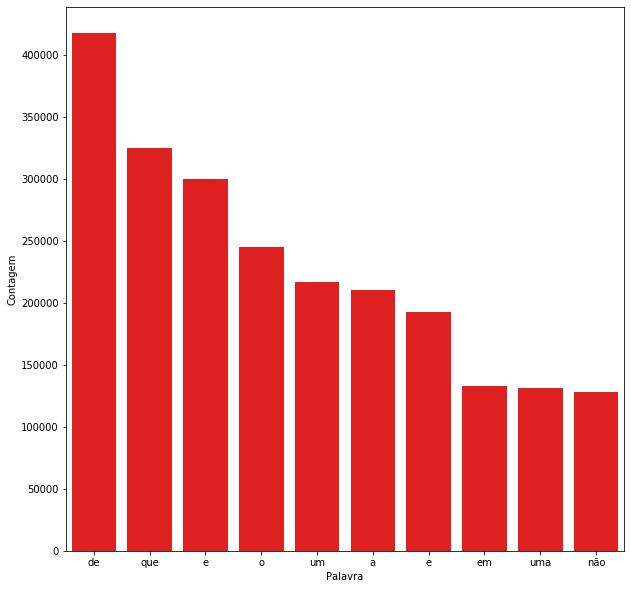

In [29]:
token_epaco=tokenize.WhitespaceTokenizer()

# Gráfico de Pareto 
def pareto(texto,coluna_texto,quantidade):
    #Tolkenizar
    todas_palavras=''.join([texto for texto in texto[coluna_texto]])
    token_frase=token_epaco.tokenize(todas_palavras)
    frequencia=nltk.FreqDist(token_frase)
    df_frequencias=pd.DataFrame({'Palavra':list(frequencia.keys()),
                                "Frequência": list(frequencia.values())})
    df_frequencia=df_frequencias.nlargest(columns="Frequência",n=quantidade)

    #Figura
    plt.figure(figsize=(10,10))
    ax=sns.barplot(data=df_frequencia, x="Palavra" , y="Frequência",color='red')
    ax.set(ylabel='Contagem')
    plt.show()
    
pareto(resenha,'text_pt',10)

## 5.Stop Words

In [30]:
#Rotina de processamento 1

palavras_irrelevantes=nltk.corpus.stopwords.words("portuguese")

frase_processada=list()

palavras_irrelevantes=nltk.corpus.stopwords.words("portuguese")

for critica in resenha.text_pt:
    nova_frase=list()
    palavras_texto=token_epaco.tokenize(critica)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)        
    frase_processada.append(' '.join(nova_frase))

resenha['Tratamento_1']=frase_processada

In [31]:
resenha.sample(2)

,id,text_en,text_pt,sentiment,classificacao,Tratamento_1
14163,14165,First off - this film will not be for everybod...,Primeiramente fora - este filme não será para ...,pos,1,Primeiramente - filme todos. Há cenas extrema ...
1022,1023,"First things first, I am by no means a picky m...","Primeiras coisas primeiro, eu não sou de jeito...",neg,0,"Primeiras coisas primeiro, jeito nenhum observ..."


In [32]:
#Modelo de predição usando varivíes tratadas 

classificar_texto(resenha,'Tratamento_1', "classificacao").round(2)

0.66

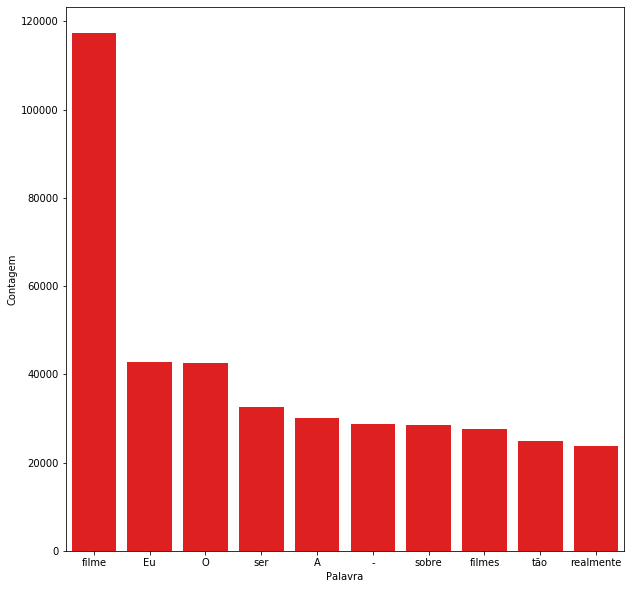

In [33]:
# Nova frequência de palavras
pareto(resenha,'Tratamento_1',10)

## 6.Tratar o texto

In [34]:
# Limpar pontuação
token_pontuacao=tokenize.WordPunctTokenizer()
pontuacao=list()

for ponto in punctuation:
    pontuacao.append(ponto)
    
pontuacao_stopwords=pontuacao+palavras_irrelevantes


frase_processada=list()

for critica in resenha.Tratamento_1:
    
    nova_frase=list()
    palavras_texto=token_pontuacao.tokenize(critica)
    
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)        
    frase_processada.append(' '.join(nova_frase))

resenha['Tratamento_2']=frase_processada

In [39]:
# Tirar acentos
sem_acentos=[unidecode.unidecode(texto) for texto in resenha['Tratamento_2']]

stopwords_sem_acento=[unidecode.unidecode(texto) for texto in pontuacao_stopwords]

resenha['Tratamento_3']=sem_acentos

frase_processada=list()

for critica in resenha.Tratamento_3:
    
    nova_frase=list()
    palavras_texto=token_pontuacao.tokenize(critica)
    
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)        
    frase_processada.append(' '.join(nova_frase))

resenha['Tratamento_3']=frase_processada

In [40]:
# Todas as palavras em minúsculo 

frase_processada=list()

for critica in resenha.Tratamento_3:
    
    nova_frase=list()
    critica=critica.lower()
    palavras_texto=token_pontuacao.tokenize(critica)
    
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)        
    frase_processada.append(' '.join(nova_frase))

resenha['Tratamento_4']=frase_processada

* Avaliando as predições após os tratamentos

In [41]:
#Acuracia
classificar_texto(resenha,'Tratamento_4','classificacao').round(2)

0.69

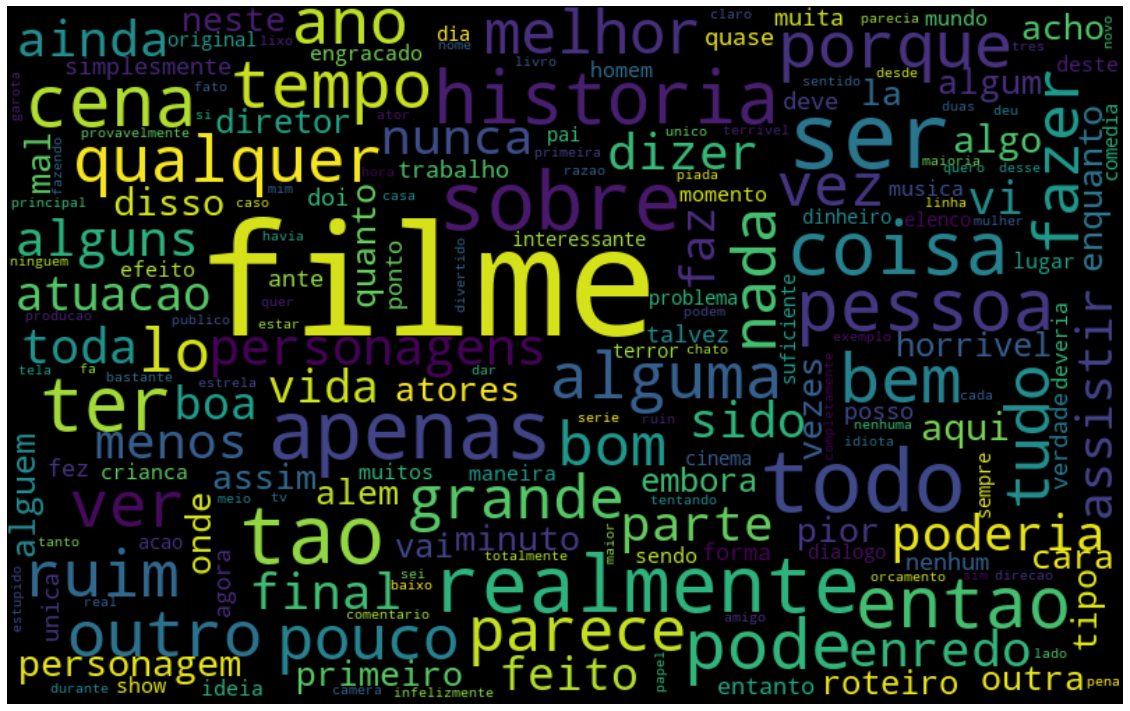

In [42]:
nuvem_palavras_neg(resenha,'Tratamento_4')

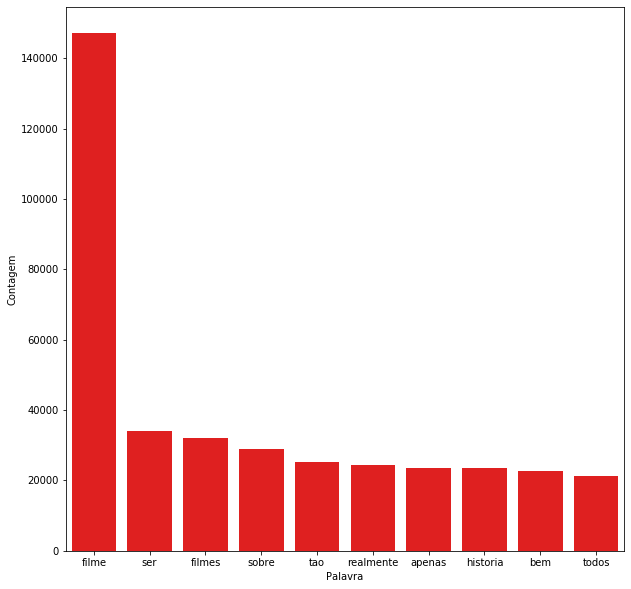

In [43]:
pareto(resenha,'Tratamento_4',10)

In [46]:
print('Antes dos tratamentos \n')
resenha.text_pt[0]

Antes dos tratamentos 



'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [47]:
print('Depois dos tratamentos \n')
resenha.Tratamento_4[0]

Depois dos tratamentos 



'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

## 7.Evitando flexões e derivações nas palavras

Em processamento de linguagem natural, o processo de reduzir os elementos a um radical comum é chamado de "stemização" - ou seja, reduzir uma palavra com determinadas variações a um radical comum. No nosso pareto, temos uma ocorrência dessa situação: as palavras "filme" e "filmes", que só se diferenciam em número.

In [48]:
#Frases em smtmmizadas 

stemmer = nltk.RSLPStemmer()

frase_processada=list()

for critica in resenha.Tratamento_4:
    
    nova_frase=list()
    palavras_texto=token_pontuacao.tokenize(critica)
    
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))        
    frase_processada.append(' '.join(nova_frase))

resenha['Tratamento_5']=frase_processada

In [50]:
# Acuracia de um modelo usando o tratamento 5
classificar_texto(resenha,'Tratamento_5','classificacao').round(2)

0.69

## 8.TF-IDF e Ngrams

In [51]:
tfidf = TfidfVectorizer(lowercase=False, max_features=50)
tfidf_tratados = tfidf.fit_transform(resenha["Tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, resenha["classificacao"], random_state = 42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)

# modelo usando tf-if
print(acuracia_tfidf_tratados.round(2))

0.7


* Ngrams: Nos campos da lingüística e probabilidade computacional, um n-grama é uma sequência contígua de n itens de uma determinada amostra de texto ou fala. Os itens podem ser fonemas, sílabas, letras, palavras ou pares de bases de acordo com a aplicação. Os n-gramas são tipicamente coletados de um corpus de texto ou fala. Quando os itens são palavras, n-gramas também podem ser chamados de telhas

In [53]:
# modelo usando n-gramas 

tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(resenha["Tratamento_5"])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha["classificacao"], random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams.round(2))

0.89
